In [1]:
#Importing libraries that will be used.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kiva_loans= pd.read_csv("kiva_loans.csv")

In [3]:
kiva_mpi_region= pd.read_csv("kiva_mpi_region_locations.csv")

In [4]:
loan_theme_ids= pd.read_csv("loan_theme_ids.csv")

In [5]:
loan_themes_by_region= pd.read_csv("loan_themes_by_region.csv")

In [6]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [7]:
#Convert into lower case
kiva_mpi_region.columns = [col.lower() for col in kiva_mpi_region]
kiva_mpi_region.head()

,locationname,iso,country,region,world_region,mpi,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [8]:
#Convert into lower case
loan_theme_ids.columns=[col.lower() for col in loan_theme_ids.columns]
loan_theme_ids.head()

,id,loan theme id,loan theme type,partner id
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [9]:
#Convert into lower case
loan_themes_by_region.columns=[col.lower() for col in loan_themes_by_region.columns]
loan_themes_by_region.head()

,partner id,field partner name,sector,loan theme id,loan theme type,country,forkiva,region,geocode_old,iso,...,amount,locationname,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [ ]:
df.describe

In [10]:
#checking missing data on Kiva loans
kiva_loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [11]:
#checking missing data on mpi region
kiva_mpi_region.isnull().sum()

locationname    1788
iso             1764
country         1764
region          1788
world_region    1764
mpi             1788
geo                0
lat             1880
lon             1880
dtype: int64

In [12]:
#checking missing data on loan_theme_ids 
loan_theme_ids.isnull().sum()

id                     0
loan theme id      14813
loan theme type    14813
partner id         14813
dtype: int64

In [13]:
#Checking missing data on loan_themes_by_region
loan_themes_by_region.isnull().sum()

partner id                0
field partner name        0
sector                    0
loan theme id             0
loan theme type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
iso                      14
number                    0
amount                    0
locationname              0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64

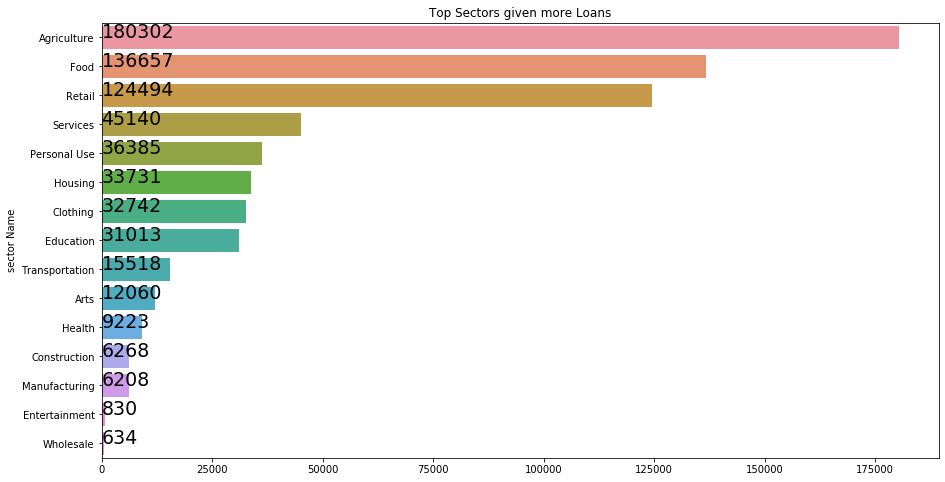

In [14]:
#plot to show sectors that were given more loans 
plt.figure(figsize=(15,8))
sector_name = kiva_loans['sector'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate ( sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xticks(rotation = 'horizontal')
#plt.xlabels('Number of loans given')
plt.ylabel('sector Name')
plt.title("Top Sectors given more Loans")
plt.show()

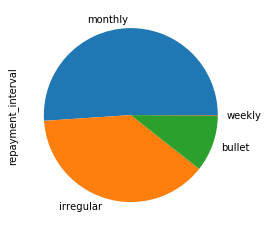

In [15]:
#Repayment intervals
kiva_loans['repayment_interval'].value_counts().plot(kind="pie")

Text(0.5, 1.0, 'Region that got more loan')

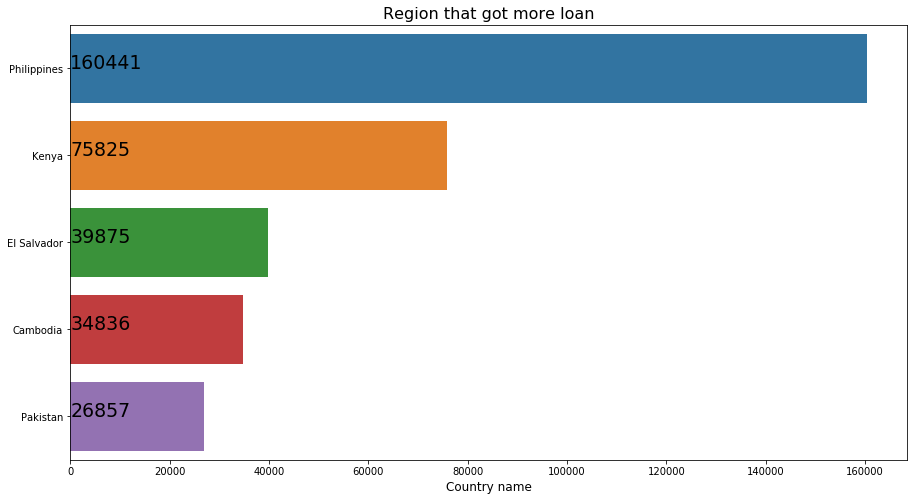

In [16]:
#COuntries which got most loans 
plt.figure(figsize=(15,8))
count= kiva_loans['country'].value_counts().head()
sns.barplot(count.values, count.index)
for i, v in enumerate ( count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.xlabel('Country name', fontsize=12)
plt.title('Region that got more loan', fontsize=16)

Text(0.5, 1.0, 'Most freequent countries for kiva loan')

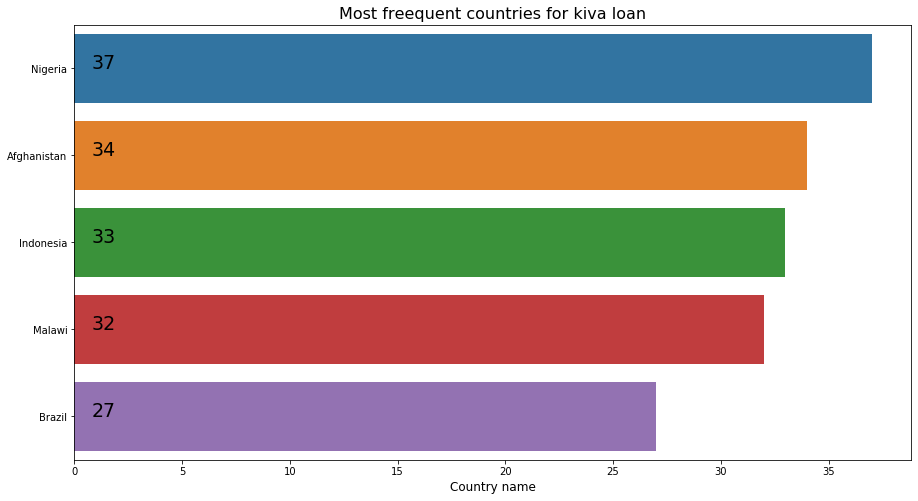

In [17]:
#MPI regions that got the most loans 
plt.figure(figsize=(15,8))
count= kiva_mpi_region['country'].value_counts().head()
sns.barplot(count.values, count.index)
for i, v in enumerate ( count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.xlabel('Country name', fontsize=12)
plt.title('Most freequent countries for kiva loan', fontsize=16)

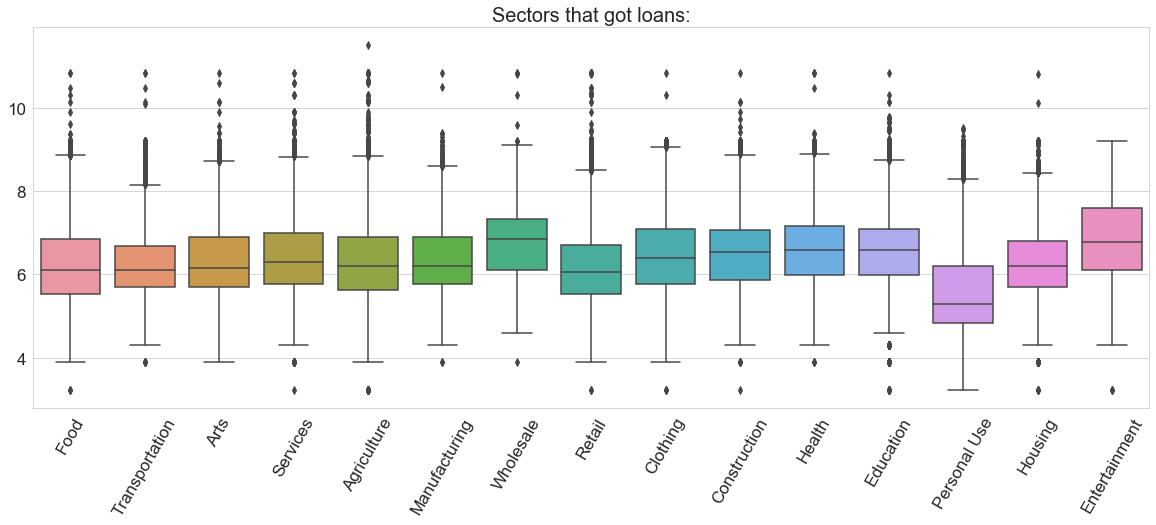

In [19]:
#Sectors which reveived funding, Using box plot  
kiva_loans['loan_amount_log']= np.log(kiva_loans['loan_amount'])
plt.figure(figsize=(20,7))

sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=kiva_loans)
boxplot.set(xlabel='', ylabel='')
plt.title('Sectors that got loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()


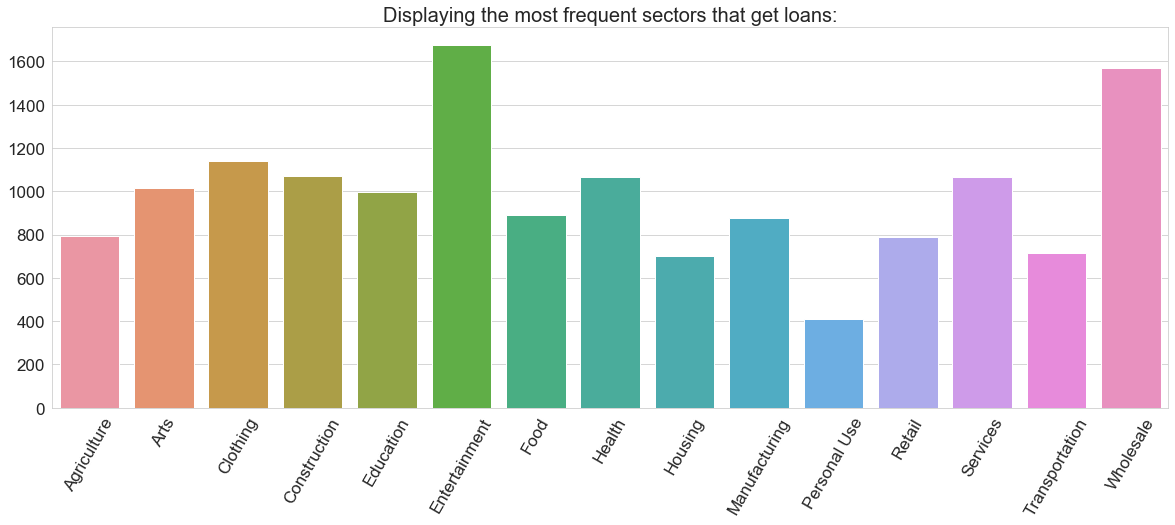

In [20]:
#Sector avarange investment


kiva_loans_sectors = pd.DataFrame(kiva_loans.groupby(['sector'])['loan_amount'].mean())
kiva_loans_sectors.reset_index(inplace=True)
kiva_loans_sectors.columns = ['sector', 'average_frequent_sectors']

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.barplot(x='sector', y='average_frequent_sectors', data=kiva_loans_sectors)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying the most frequent sectors that get loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()



